In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create the base sample, choose the pourcentage of each blood group (25% by default).
def baseSample(group_A=25,group_B=25,group_AB=25,group_O=25):
    sample = []
    for i in range(0,100):
        randomNumber = rd.random()
        if randomNumber*100 <= group_A:
            sample.append("A")
        elif group_A < randomNumber*100 <= group_A+group_B:
            sample.append("B")
        elif group_A+group_B < randomNumber*100 <= group_A+group_B+group_AB:
            sample.append("AB")
        elif group_A+group_B+group_AB < randomNumber*100 <= group_A+group_B+group_AB+group_O:
            sample.append("O")
        else:
            sample.append("Error")

    couples = np.array(sample).reshape(50,2)

    return couples

In [3]:
# Create the initial sample
def baseSample(group_A=25,group_B=25,group_AB=25,group_O=25):
    initA = []
    for i in range(0,group_A):
        initA.append("A")
    initB = []
    for i in range(0,group_B):
        initB.append("B")
    initAB = []
    for i in range(0,group_AB):
        initAB.append("AB")
    initO = []
    for i in range(0,group_O):
        initO.append("O")

    sample = initA+initB+initAB+initO
    rd.shuffle(sample)
    
    couples = np.array(sample).reshape(50,2)

    return couples

In [4]:
# define the child blood group for each couple of parent
def childrenBlood(couples):
  children =[]
  for i in couples:
    randomNumber = rd.random()
    if "".join(i) == "AA":
      if randomNumber <= 0.0625:
        children.append("O")
      else:
        children.append("A")
    elif "".join(i) == "AB" or "".join(i) == "BA":
      if randomNumber <= 0.0625:
        children.append("O")
      elif 0.0625 < randomNumber <= 0.625:
        children.append("AB")
      elif 0.625 < randomNumber <= 0.8125:
        children.append("A")
      elif 0.8125 < randomNumber <= 1:
        children.append("B")
      else:
        print("Error in 2nd condition")
    elif "".join(i) == "AAB" or "".join(i) == "ABA":
      if randomNumber <= 0.5:
        children.append("A")
      elif 0.5 < randomNumber <= 0.875:
        children.append("AB")
      elif 0.875 < randomNumber <= 1:
        children.append("B")
      else:
        print("Error in 3rd condition")
    elif "".join(i) == "AO" or "".join(i) == "OA":
      if randomNumber <= 0.25:
        children.append("O")
      elif 0.25 < randomNumber <= 1:
        children.append("A")
      else:
        print("Error in 4th condition")
    elif "".join(i) == "BB":
      if randomNumber <= 0.0625:
        children.append("O")
      else:
        children.append("B")
    elif "".join(i) == "BO" or "".join(i) == "OB":
      if randomNumber <= 0.25:
        children.append("O")
      elif 0.25 < randomNumber <= 1:
        children.append("B")
      else:
        print("Error in 6th condition")
    elif "".join(i) == "BAB" or "".join(i) == "ABB":
      if randomNumber <= 0.5:
        children.append("B")
      elif 0.5 < randomNumber <= 0.875:
        children.append("AB")
      elif 0.875 < randomNumber <= 1:
        children.append("A")
      else:
        print("Error in 7th condition")
    elif "".join(i) == "OO":
      children.append("O")
    elif "".join(i) == "OAB" or "".join(i) == "ABO":
      if randomNumber <= 0.5:
        children.append("A")
      elif 0.5 < randomNumber <= 1:
        children.append("B")
      else:
        print("Error in 9th condition")
    elif "".join(i) == "ABAB":
      if randomNumber <= 0.5:
        children.append("AB")
      elif 0.5 < randomNumber <= 0.75:
        children.append("A")
      elif 0.75 < randomNumber <= 1:
        children.append("B")
      else:
        print("Error in 10th condition")
    else:
      print("Erreur")

  return children


In [5]:
# Next generation function - parents blood in input -> 2 children by couple of parents
def nextGeneration(parents):
    list1 = childrenBlood(parents)
    list2 = childrenBlood(parents)
    newGeneration = np.array(list1 + list2).reshape(50,2)

    return newGeneration

In [19]:
def bloodGroupEvolution(group_A=25,group_B=25,group_AB=25,group_O=25, epochs = 100):
    if group_A+group_B+group_AB+group_O != 100:
        print("Error: the sum of all blood group must be egal to 100")
    else:
        # initialisation phase
        initialBatch = baseSample(group_A,group_B,group_AB,group_O)
        batchs = [[group_A,group_B,group_AB,group_O]]

        # Iterations
        for i in range(1,epochs+1):
            if i == 1:
                nextBatch = nextGeneration(initialBatch)
                A = nextBatch.reshape(100,1).flatten().tolist().count("A")
                B = nextBatch.reshape(100,1).flatten().tolist().count("B")
                AB = nextBatch.reshape(100,1).flatten().tolist().count("AB")
                O = nextBatch.reshape(100,1).flatten().tolist().count("O")
                batchs.append([A,B,AB,O])
            else:
                nextBatch = nextGeneration(nextBatch)
                A = nextBatch.reshape(100,1).flatten().tolist().count("A")
                B = nextBatch.reshape(100,1).flatten().tolist().count("B")
                AB = nextBatch.reshape(100,1).flatten().tolist().count("AB")
                O = nextBatch.reshape(100,1).flatten().tolist().count("O")
                batchs.append([A,B,AB,O])
        
        # Plot graph
        plt.plot(batchs)
        plt.rcParams['figure.figsize'] = [20, 5]
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.xlabel('Epochs')
        plt.ylabel('Percentage of the population')
        plt.title("Blood group evolution")
        plt.legend(['Group A', 'Group B', 'Group AB', 'Group O'])
        plt.show()

    return

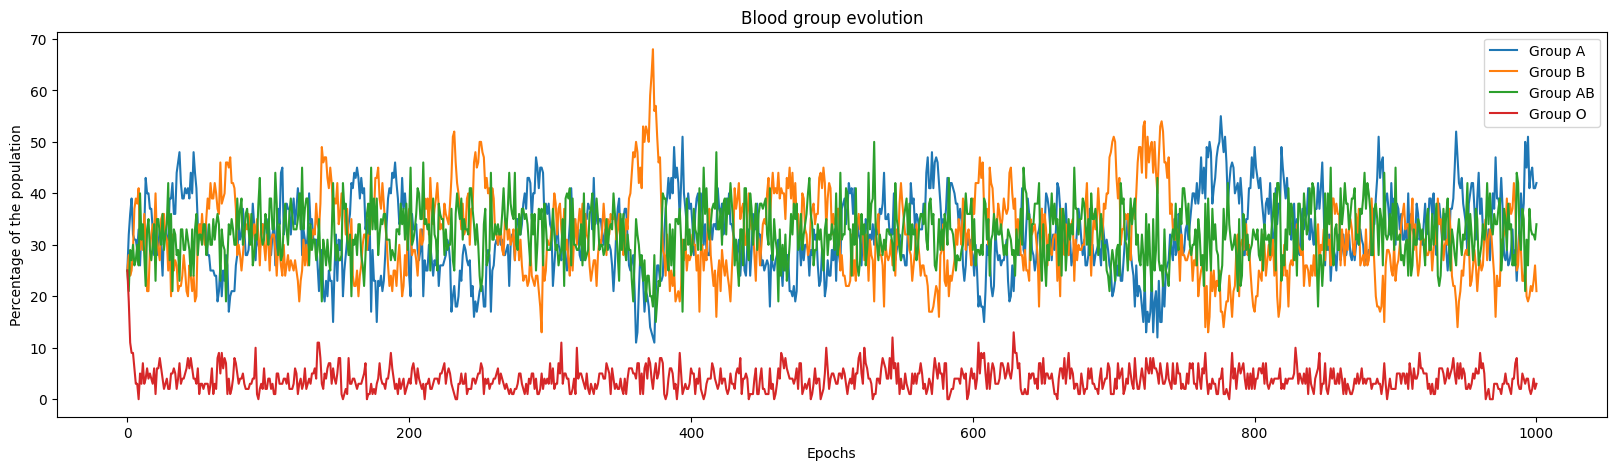

In [27]:
bloodGroupEvolution(25,25,25,25,1000)